<a href="https://colab.research.google.com/github/saravanan421/machine-learning/blob/main/taxi_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive=drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


<Axes: xlabel='CALL_TYPE', ylabel='count'>

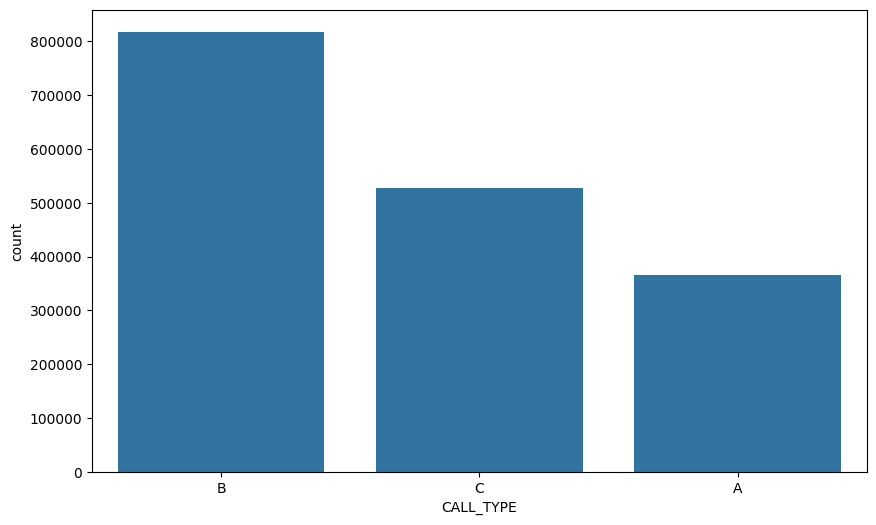

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data.CALL_TYPE.value_counts())

In [ ]:
# prompt: i want to take sample form this big population with equally datapoints

# Assuming 'data' is your DataFrame
# and you want to sample a fraction of the data (e.g., 20%)
sample_fraction = 0.2

# Sample the DataFrame, ensuring equal representation across classes (if applicable)
# Replace 'target_column' with the name of your target variable column
if 'CALL_TYPE' in data.columns:
  data_sample = data.groupby('CALL_TYPE', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))
else:
  data_sample = data.sample(frac=sample_fraction)

print(f"Original data shape: {data.shape}")
print(f"Sampled data shape: {data_sample.shape}")


Original data shape: (1710670, 9)
Sampled data shape: (342134, 9)


In [ ]:
data_sample.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
436194,1380889532620000453,A,11467.0,NaN,20000453,1380889532,A,False,"[[-8.598393,41.14323],[-8.597439,41.142537],[-..."
102651,1374495166620000632,A,2002.0,NaN,20000632,1374495166,A,False,"[[-8.621244,41.14341],[-8.621235,41.143419],[-..."
700662,1385650986620000606,A,24886.0,NaN,20000606,1385650986,A,False,"[[-8.607654,41.150313],[-8.607654,41.15025],[-..."
239294,1377296282620000067,A,36317.0,NaN,20000067,1377296282,A,False,"[[-8.620416,41.176089],[-8.620353,41.175783],[..."
1097986,1393256001620000577,A,63882.0,NaN,20000577,1393256001,A,False,"[[-8.619525,41.181435],[-8.619525,41.181435],[..."


In [ ]:
data_sample.CALL_TYPE.value_counts()

,count
CALL_TYPE,
B,163576
C,105604
A,72954


In [ ]:
type_a=data_sample[data_sample['CALL_TYPE']=='A']
type_b=data_sample[data_sample['CALL_TYPE']=='B']
type_c=data_sample[data_sample['CALL_TYPE']=='C']
new_data=pd.concat([type_a.iloc[0:50000,:],type_b.iloc[0:50000,:],type_c.iloc[0:50000,:]],axis=0)

# Now you can use value_counts()
new_data.CALL_TYPE.value_counts()

,count
CALL_TYPE,
A,50000
B,50000
C,50000


<Axes: >

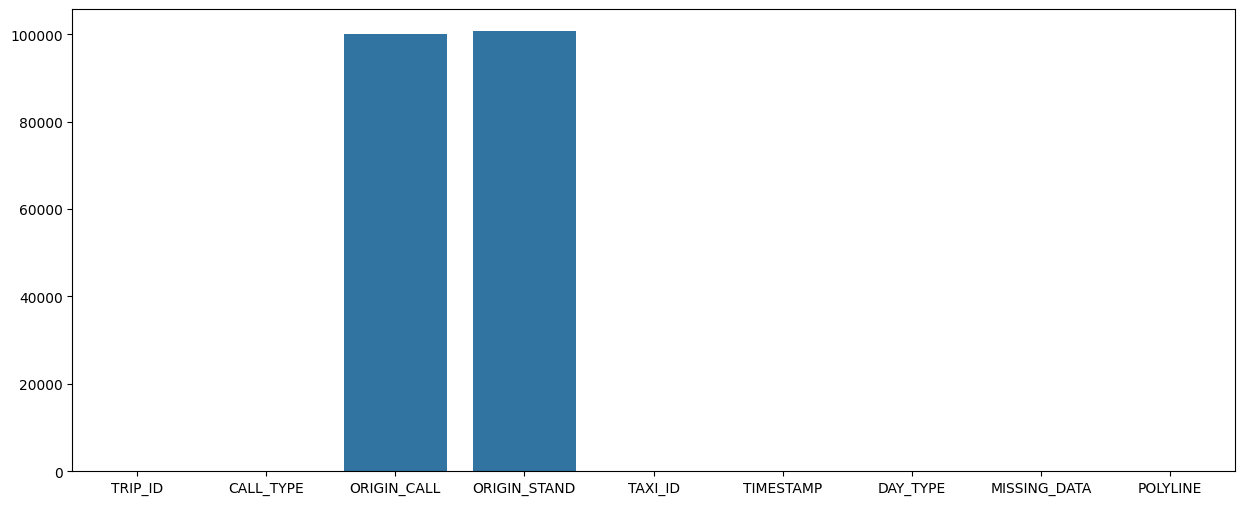

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(new_data.isna().sum())

In [ ]:
d=new_data.POLYLINE.iloc[0]
d

'[[-8.598393,41.14323],[-8.597439,41.142537],[-8.596251,41.1417],[-8.596215,41.142366],[-8.596557,41.143086],[-8.597484,41.143797],[-8.597871,41.144661],[-8.59824,41.145651],[-8.598933,41.145957],[-8.599086,41.145957],[-8.600823,41.145804],[-8.601732,41.145723],[-8.601903,41.146182],[-8.601903,41.146299],[-8.602038,41.146956],[-8.602515,41.146875],[-8.602587,41.146821],[-8.602587,41.14683],[-8.603307,41.14665],[-8.604387,41.146551],[-8.604792,41.146596],[-8.606412,41.146902],[-8.606745,41.146965],[-8.606754,41.146929],[-8.606772,41.146902],[-8.607465,41.147091],[-8.608896,41.147424],[-8.610354,41.147667],[-8.610444,41.147694],[-8.61138,41.147892],[-8.612298,41.148108],[-8.61372,41.148369],[-8.614413,41.148081]]'

In [ ]:
len(new_data.TRIP_ID.value_counts())

150000